# Programming Assignment 1: Markov Chains and PageRank

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as la
import networkx as nx
print "Modules Imported!"

/Users/melancholymirth/miniconda3/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Modules Imported!


Recall that a Markov chain is a stochastic signal $X = (X_t)_{t \in {\mathbb Z_+}}$, where the distribution of the state $X_{t+1}$ at time $t+1$ is determined by the state $X_t$. The state transitions in a time-homogeneous Markov chain with finite state space $\{1,2,\ldots,n\}$ are fully specified by the $n\times n$ transition probability matrix $M = (M(x,y))$, where

$$
M(x,y) = {\mathbf P}[X_{t+1} = y|X_t = x].
$$

If the initial state $X_0$ has distribution $p_0$, then the distribution $p_t$ of $X_t$ is obtained by matrix multiplication:

$$
p_t = p_0 M^t,
$$

where we represent distributions by row vectors of dimension $n$.

The code below creates a Python objects for performing Markov updates of this sort.

In [3]:
# Markov distribution update object

class Markov_dist_update:
    def __init__(self, M, p0):   # The transition probability matrix and initial distribution are passed
        self.M = M 
        self.p0 = p0
        self.n=np.size(p0)
        if np.shape(M) != (self.n,self.n):
            print "Error: Shape of M doesn't match p0"
    
    def p(self,t):    # update the distribution of the state at time t
        p_new=self.p0
        for s in range(t):
            p_new = np.dot(p_new,self.M)    # one-step distribution update
        return p_new

This object has a {\em state}: it remembers its most recent output. This can be very useful. For example, consider a two-state Markov chain with transition matrix

$$
M = \left(
\begin{matrix}
0.7 & 0.3 \\
0.3 & 0.7
\end{matrix}
\right)
$$

and suppose that the initial state $X_0$ has a ${\rm Bernoulli}(0.2)$ distribution. The following code uses  `Markov_dist_update` to compute $p_1 = p_0 M$:

In [4]:
M = np.array([[0.7,0.3],[0.3,0.7]])
p0 = np.array([0.8,0.2])
next_p = Markov_dist_update(M,p0)
print next_p.p(0) # prints the initial distribution passed to Markov_dist_update
print next_p.p(1) # prints the one-step update

[ 0.8  0.2]
[ 0.62  0.38]


Now we are going to compute the two-step update:

In [5]:
print next_p.p(2)

[ 0.548  0.452]


... and compare it with the output of $p_2 = p_0 M^2$:

In [6]:
p2 = np.dot(p0,la.matrix_power(M,2))
print p2

[ 0.548  0.452]


<b>Exercise 1</b>: in the code cell below, write Python code to compute $p_{15}$ in two ways: using `Markov_dist_update` and the matrix multiplication formula. Compare your results -- they better be the same!

In [7]:
########## student code for Exercise 1 here ##########
print next_p.p(15)
print np.dot(p0,la.matrix_power(M,15))

[ 0.50000032  0.49999968]
[ 0.50000032  0.49999968]


Using `matplotlib` and `Markov_dist_update` together, we can visualize the time evolution of $p_t$, as the code below shows:

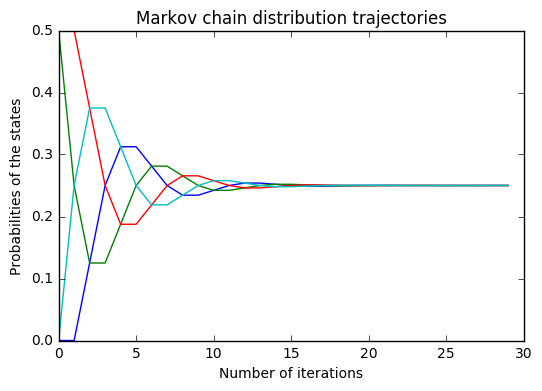

In [8]:
# An example of how you can use the class to track the distribution of the state of a Markov chain

M=np.array([[0.5,0.5,0,0],[0,0.5,0.5,0],[0,0,0.5,0.5],[0.5,0,0,0.5]])    # set up the Markov matrix
p0=np.array([0,0.5,0.5,0])   # specify the initial distribution
markov=Markov_dist_update(M,p0)   # create a Markov_dist_update_object

nstates = len(p0)   # number of states
niter = 30    # number of iterations
updates = np.stack((markov.p(s) for s in range(niter)),axis=-1)  # stack all the updates into an array
for s in range(nstates):
    plt.plot(updates[s])

plt.title('Markov chain distribution trajectories')
plt.xlabel('Number of iterations')
plt.ylabel('Probabilities of the states')

Feel free to experiment with the above code: change the number of states, Markov transition matrix, initial distribution, etc.

_Beware_: `Markov_dist_update` will not throw an error message if $M$ is not a valid Markov matrix or if $p_0$ is not a valid probability distribution!

## Total variation distance and contraction property of Markov updates

We will now investigate, by means of simulations, the effect of initial state distribution on the long-term behavior of Markov chains. In particular, given two possible initial distributions $p_0$ and $q_0$ for the initial state $X_0$, we would like to examine how close the iterates $p_t = p_0 M^t$ and $q_t = q_0 M^t$ stay to each other. To that end, let us define the following quantity for any two probability distributions $p$ and $q$ on the same state space ${\mathsf X}$:

$$
d_{{\rm TV}}(p,q) := \frac{1}{2}\sum_{x \in {\mathsf X}} |p(x) - q(x)|.
$$

Spend a few minutes to convince yourselves that it obeys the following:

<ol>
<li> $d_{{\rm TV}}(p,q) \ge 0$ for all $p,q$
<li> $d_{{\rm TV}}(p,q) = 0$ if and only if $p \equiv q$
<li> $d_{{\rm TV}}(p,q) \le d_{{\rm TV}}(p,r) + d_{{\rm TV}}(r,q)$ for any three probability distributions $p,q,r$
</ol>

In other words, $d_{{\rm TV}}$ can be thought of as a _distance_ between probability distributions: it is nonnegative; equals zero if and only if the two distributions are exactly the same (i.e., assign the same probability to each state); and it satisfies the triangle inequality. For this reason, it has a name -- _total variation distance_.

<b>Problem 1:</b> In the markdown cell below, prove that $d_{{\rm TV}}(p,q)$ always takes values between $0$ and $1$, and find the necessary and sufficient condition for $d_{{\rm TV}}(p,q) = 1$.

--- student answer for Problem 1 goes here ---  

*proof*:
$$
 0 \le \frac{1}{2}\sum_{x \in {\mathsf X}} |p(x) - q(x)| \le \frac{1}{2}\sum_{x \in {\mathsf X}} |p(x)| + |q(x)|
= \frac{1}{2}(\sum_{x \in {\mathsf X}} p(x) + \sum_{x \in {\mathsf X}} q(x)) = 1
$$

The necessary the sufficient condition: $\forall x \in \mathsf X, \min \{p(x),q(x)\} = 0$, which means for any events, if the probability of that event in one distribution is non-zero and that probability of that event in the other distribution has to be 0.

<b>Problem 2:</b> Consider a four-state Markov chain with transition matrix

$$
M = \left(
\begin{matrix}
2/3 & 1/3 & 0 0 \\
0 & 2/3 & 1/3 & 0 \\
0 & 0 & 2/3 & 1/3 \\
1/3 & 0 & 0 & 2/3
\end{matrix}
\right).
$$


Pick any two initial state distributions $p_0$ and $q_0$ with $d_{{\rm TV}}(p_0,q_0) = 1$. In the cell below, write Python code based on `Markov_dist_update` to plot the total variation distance $d_{{\rm TV}}(p_t,q_t)$ for $t = 0, 1,\ldots, 30$. 

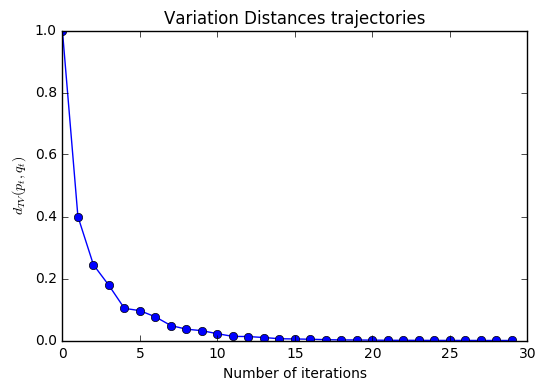

In [9]:
######## student code for Problem 2 goes here #########
M = np.array([[2/3.,1/3.,0,0],[0,2/3.,1/3.,0],[0,0,2/3.,1/3.],[1/3.,0,0,2/3.]])
# if d_TV(p0,q0) = 1
p0 = np.array([0.2, 0, 0.8, 0])
q0 = np.array([0., 0.4, 0., 0.6])
# if d_TV(p0,q0) = 1
#p0 = np.array([0.2, 0, 0.8, 0])
#q0 = np.array([0., 0.1, 0., 0.9])
# if d_TV(p0,q0) < 1
#p0 = np.array([0.2, 0.3, 0.4, 0.1])
#q0 = np.array([0.05, 0.15, 0.3, 0.5])
p_markov = Markov_dist_update(M,p0)
q_markov = Markov_dist_update(M,q0)
d_updates = np.stack((np.abs(p_markov.p(i)-q_markov.p(i)).sum()*0.5 for i in xrange(30)), axis=0)

# plot

plt.plot(np.arange(30),d_updates,'-o')
plt.title('Variation Distances trajectories')
plt.xlabel('Number of iterations')
plt.ylabel('$d_{TV}(p_t,q_t)$')



What do you observe? Does $d_{\rm TV}(p_t,q_t)$ increase or decrease with time? Experiment with changing $M$, $p_0$, or $q_0$ -- does this behavior persist? What if you choose $p_0$ and $q_0$ with $0 < d_{\rm TV}(p_0,q_0) < 1$?

--- student answer here ---  
Observation: $d_{TV}(p_t,q_t)$ decreases with time. When choosing different intial distribution, even with $0 < d_{\rm TV}(p_0,q_0) < 1$, the behavior persists.

In the markdown cell below, prove the _contraction property of Markov chains_: for any two initial probability distributions $p_0$ and $q_0$,

$$
d_{\rm TV}(p_{t+1},q_{t+1}) \le d_{\rm TV}(p_t,q_t).
$$

--- student answer here ---  

*proof*:  
\begin{align}
d_{TV}(p_{t+1},q_{t+1}) 
    &= \displaystyle\sum_{x \in \mathsf{X}}\big{|} p_{t+1}(x)-q_{t+1}(x)\big{|} \\
    &= \displaystyle\sum_{x \in \mathsf{X}}\big{|} Mp_t(x)-Mq_t(x) \big{|}\\
    &= \displaystyle\sum_{x \in \mathsf{X}}\big{|} \displaystyle\sum_y M(x,y)p_t(y)-M(x,y)q_t(y)\big{|}\\
    &= \displaystyle\sum_{x \in \mathsf{X}} M(x,y)\, \big{|} \displaystyle\sum_y p_t(y)-q_t(y)\big{|}\\
    &\le \displaystyle\sum_{x \in \mathsf{X}} M(x,y)  \displaystyle\sum_y \big{|}p_t(y)-q_t(y)\big{|}\\
    &= \displaystyle\sum_y \big{|}p_t(y)-q_t(y)\big{|} \displaystyle\sum_{x \in \mathsf{X}} M(x,y), ~~(  \displaystyle\sum_{x \in \mathsf{X}} M(x,y) = 1, \text{since the sum of column of M is 1})\\
    & = \displaystyle\sum_y \big{|}p_t(y)-q_t(y)\big{|}\\
    & = d_{TV}(p_t,q_t)
\end{align}

## PageRank ##

The PageRank algorithm discussed in class finds a vector of webpage ranks satisfying a certain self-consistency condition based on the hyperlink graph. In this part of the assignment, you will investigate the convergence properties of PageRank. The main idea behind PageRank is that the desired ranking is an invariant probability distribution of a certain Markov chain. Thus, we consider the state space ${\mathsf X} = \{1,\ldots,n\}$, where $n$ is the number of webpages of interest. We start by building the _web graph_: each webpage $i \in {\mathsf X}$ is associated with a vertex, and we draw an arrow (also called a directed edge or an arc) from vertex $i$ to vertex $j$ if and only if page $i$ contains a hyperlink to page $j$. The cell below uses the `networkx` module to generate a random web graph.

Specifically, we use the simplest model of a random graph, the so-called _Erd&#x0151;s--R&eacute;nyi graph_. Such a graph has $n$ vertices, and the edges between vertices are added at random. In the undirected version, denoted by $G(n,p)$, an edge between any two distinct vertices $i$ and $j$ is included with probability $p$ independently of all other edges. In the directed version, denoted by $G_d(n,p)$, the edges from $i$ to $j$ and from $j$ to $i$ are treated separately, and each is included with probability $p$, again independently of all others. The code below generates and displays a $G_d(10,0.5)$ random graph. You should experiment with it by changing the number of vertices and the edge inclusion probability.

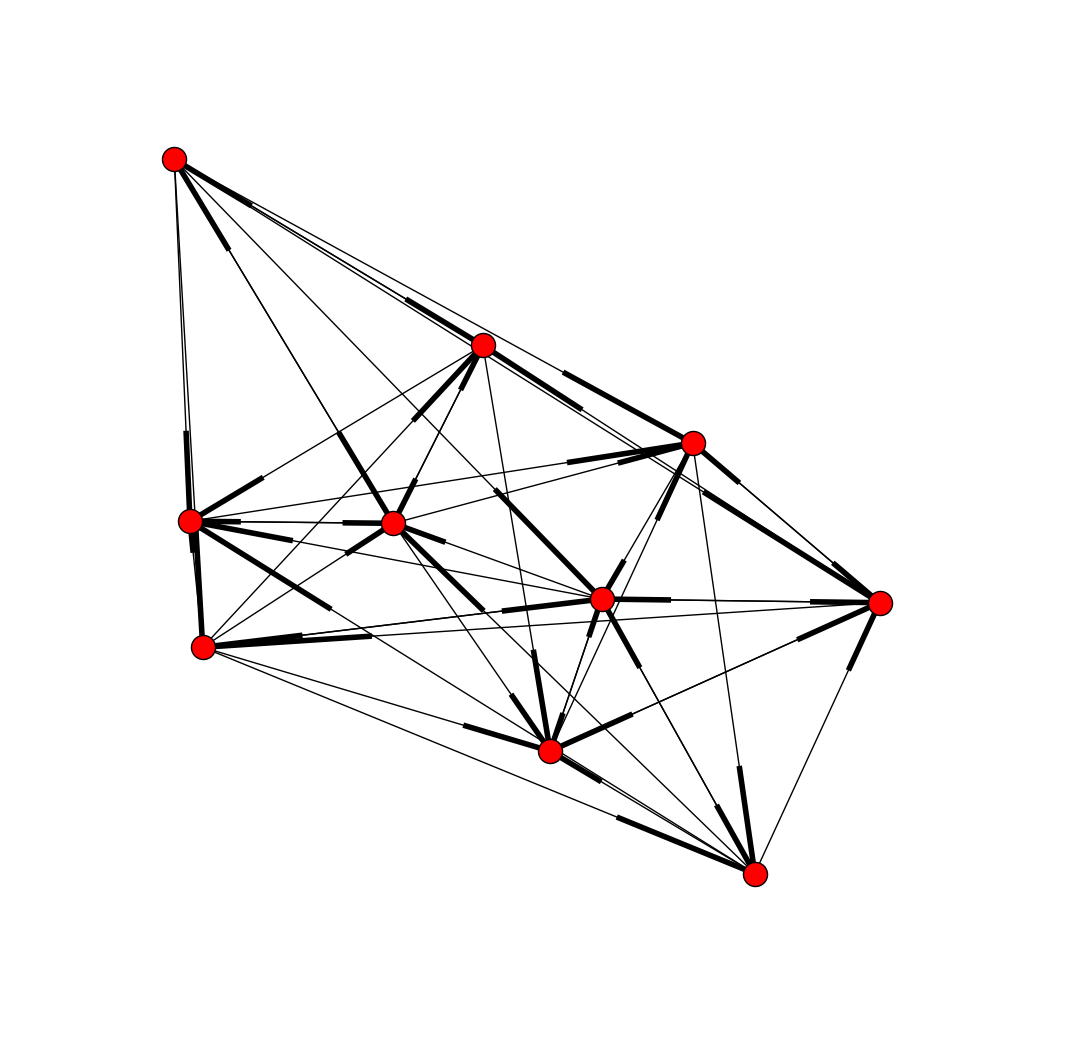

In [10]:
n = 10
p = 0.5
network1 = nx.erdos_renyi_graph(n,p, seed=None, directed=True)
plt.figure(figsize=(10,10))
nx.draw(network1)

The above code is slow when $n$ is large and $p$ is close to $1$. The code below is optimized to generate sparse random graphs, where $p$ is small.

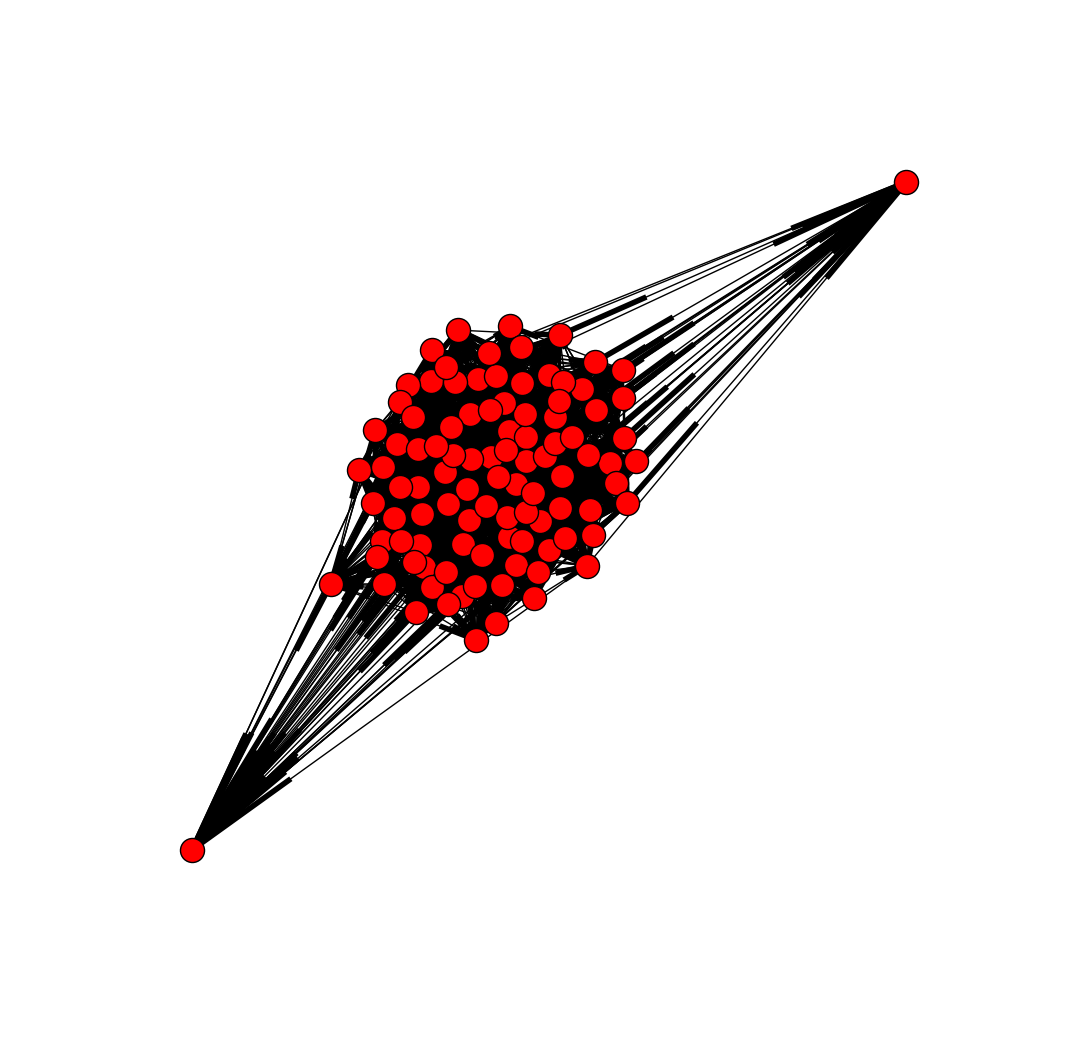

In [11]:
n = 100
p = 0.2
network2 = nx.fast_gnp_random_graph(n,p, seed=None, directed=True)
plt.figure(figsize=(10,10))
nx.draw(network2)

The code below generates a random webgraph and constructs the Markov matrix corresponding to a Random Surfer Model on that graph.

Once the random webgraph is generated, we extract its _adjacency matrix_ $A$. This is an $n\times n$ matrix, where the entry in row $i$ and column $j$ is $1$ if there is an edge from $i$ to $j$, and $0$ otherwise. The Python function `nx.adjacency_matrix()` takes a graph object as input and returns its adjacency matrix in the so-called _sparse matrix_ format, i.e., as a list of (row,column) pairs where the matrix has a nonzero entry. We use `todense()` function to convert the sparse matrix to the usual `numpy` array. Then we create the Markov matrix $S$ corresponding to the Random Surfer Model on our random webgraph. The number of vertices $n$ is deliberately set to a small value, so that the matrix $S$ can be easily displayed. You should experiment with this code by changing `num_pages` and `link_prob`.


In [12]:
num_pages = 100   # specify the number of webpages
link_prob = 0.2  # specify the probability of an outgoing link
webgraph = nx.fast_gnp_random_graph(num_pages, link_prob, seed=None, directed=True)   # generate a random webgraph
A = nx.adjacency_matrix(webgraph)    # extract the adjacency matrix
B = np.array(A.todense())            # convert to dense np.array
row_sums = B.sum(axis=1)             # compute row sums
a = np.zeros(num_pages)              
a[row_sums == 0] = 1                 # create a vector that keeps track of pages with no outgoing links

#### now we generate the Random Surfer Model matrix ####
E = np.zeros((num_pages,num_pages))
E[:,0] = a                          
V = np.add(B,E)
row_sums = V.sum(axis=1)
S = V.astype(np.float) / row_sums.reshape(num_pages,1)
print S

[[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.05263158 ...,  0.05263158  0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.03571429  0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.04347826  0.        ]
 [ 0.          0.04545455  0.         ...,  0.          0.          0.04545455]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]]


We are now ready to implement a first attempt at PageRank. The code below generates a large, sparse random webgraph and plots the evolution of the PageRank iterates. We start by ranking all the pages equally (i.e., $p_0$ is the uniform distribution on $\{1,\ldots,n\}$) and generate the PageRank iterates $p_t = p_0 S^t$. You should run this code multiple times to convince yourself that PageRank either produces oscillating iterates or converges to the trivial ranking where all webpages except one are assigned zero rank.

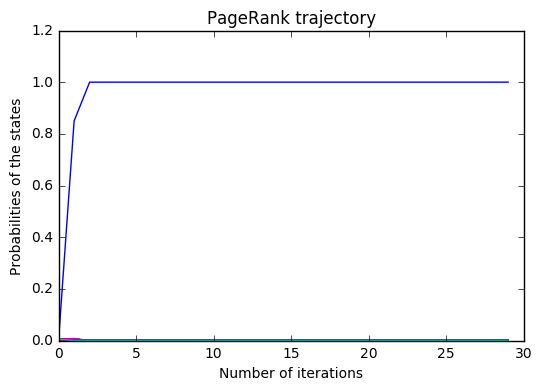

In [13]:
num_pages = 200    # specify the number of webpages
link_prob = 0.001  # specify the probability of an outgoing link
webgraph = nx.fast_gnp_random_graph(num_pages, link_prob, seed=None, directed=True)   # generate a random webgraph
A = nx.adjacency_matrix(webgraph)    # extract the adjacency matrix
B = np.array(A.todense())            # convert to dense np.array
row_sums = B.sum(axis=1)             # compute row sums
a = np.zeros(num_pages)              
a[row_sums == 0] = 1                 # create a vector that keeps track of pages with no outgoing links

#### now we generate the Random Surfer Model matrix ####
E = np.zeros((num_pages,num_pages))
E[:,0] = a                          
V = np.add(B,E)
row_sums = V.sum(axis=1)
S = V.astype(np.float) / row_sums.reshape(num_pages,1)

#### first attempt at PageRank #####
p0 = np.ones(num_pages) / num_pages     # initialize with the uniform distribution
PR = Markov_dist_update(S,p0)           # instantiate a Markov_dist_update object
nstates = len(p0)   # number of states
niter = 30    # number of iterations
updates = np.stack((PR.p(s) for s in range(niter)),axis=-1)  # stack all the updates into an array
for s in range(nstates):
    plt.plot(updates[s])
plt.title('PageRank trajectory')
plt.xlabel('Number of iterations')
plt.ylabel('Probabilities of the states')

In [14]:
c = np.array([[1,2],[3,4]])
print c
np.sum(c,axis=0)

help(np.sum)

[[1 2]
 [3 4]]
Help on function sum in module numpy.core.fromnumeric:

sum(a, axis=None, dtype=None, out=None, keepdims=False)
    Sum of array elements over a given axis.
    
    Parameters
    ----------
    a : array_like
        Elements to sum.
    axis : None or int or tuple of ints, optional
        Axis or axes along which a sum is performed.  The default,
        axis=None, will sum all of the elements of the input array.  If
        axis is negative it counts from the last to the first axis.
    
        .. versionadded:: 1.7.0
    
        If axis is a tuple of ints, a sum is performed on all of the axes
        specified in the tuple instead of a single axis or all the axes as
        before.
    dtype : dtype, optional
        The type of the returned array and of the accumulator in which the
        elements are summed.  The dtype of `a` is used by default unless `a`
        has an integer dtype of less precision than the default platform
        integer.  In that case, 

<b>Problem 3:</b> In the code cell below, modify the above code to construct the Google matrix $G$, as described in the lecture notes. Use the setting $\alpha = 0.15$. You should now see that the PageRank algorithm always converges, and that the convergence is rather rapid. Again, run the code several times to convince yourself that this is indeed the case.

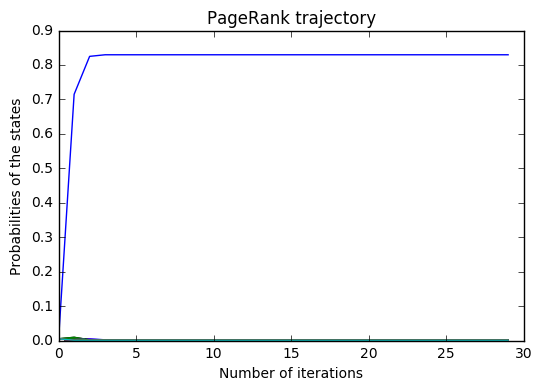

In [15]:
##### student code for Problem 3 here #####

num_pages = 200    # specify the number of webpages
link_prob = 0.001  # specify the probability of an outgoing link
webgraph = nx.fast_gnp_random_graph(num_pages, link_prob, seed=None, directed=True)   # generate a random webgraph
A = nx.adjacency_matrix(webgraph)    # extract the adjacency matrix
B = np.array(A.todense())            # convert to dense np.array
row_sums = B.sum(axis=1)             # compute row sums
a = np.zeros(num_pages)              
a[row_sums == 0] = 1                 # create a vector that keeps track of pages with no outgoing links

#### now we generate the Random Surfer Model matrix ####
E = np.zeros((num_pages,num_pages))
E[:,0] = a                          
V = np.add(B,E)
row_sums = V.sum(axis=1)
S = V.astype(np.float) / row_sums.reshape(num_pages,1)

### google matrix###
alpha = 0.15
n = num_pages
G = (1-alpha)*S + alpha/n

#### first attempt at PageRank #####
p0 = np.ones(num_pages) / num_pages     # initialize with the uniform distribution
PR = Markov_dist_update(G,p0)           # instantiate a Markov_dist_update object
nstates = len(p0)   # number of states
niter = 30    # number of iterations
updates = np.stack((PR.p(s) for s in range(niter)),axis=-1)  # stack all the updates into an array
for s in range(nstates):
    plt.plot(updates[s])
plt.title('PageRank trajectory')
plt.xlabel('Number of iterations')
plt.ylabel('Probabilities of the states')



<b>Problem 4:</b> Now we will investigate the effect of replacing the Random Surfer Model matrix $S$ with the Google matrix $G$. In the markdown cell below, prove that, for any two probability distributions $p$ and $q$ on the state space ${\mathsf X} = \{1,\ldots,n\}$, we have the _strict contraction_

$$
d_{{\rm TV}}(p G, q G) \le (1-\alpha) d_{\rm TV}(p,q).
$$

--- student answer here ---  

*proof*:
\begin{align}
d_{TV}(pG,qG) 
    &= \sum_{x=1}^n \big{|} pG(x)-qG(x) \big{|}\\
    &= \sum_{x=1}^n \big{|} \sum_{y=1}^n  p(y)G(y,x)-q(y)G(y,x) \big{|}\\
    &= \sum_{x=1}^n \big{|} \sum_{y=1}^n  (p(y)-q(y))((1-\alpha)S(y,x)+\frac{\alpha}{n}) \big{|}\\
    &= \sum_{x=1}^n \big{|} \sum_{y=1}^n  (p(y)-q(y))(1-\alpha)S(y,x) + \sum_{y=1}^n\frac{\alpha}{n} \big{|}\\
    &\le \sum_{x=1}^n [(1-\alpha)\big{|} \sum_{y=1}^n  (p(y)-q(y))S(y,x) \big{|}+ \frac{\alpha}{n}\big{|}\sum_{y=1}^n p(y)-q(y) \big{|}]\\
    &=  \sum_{x=1}^n [(1-\alpha)\big{|} \sum_{y=1}^n  (p(y)-q(y))S(y,x) \big{|}+ \frac{\alpha}{n}\big{|}(\sum_{y=1}^n p(y))-(\sum_{y=1}^nq(y)) \big{|}]\\
    &= (1-\alpha)\sum_{x=1}^n \big{|} \sum_{y=1}^n  (p(y)-q(y))S(y,x) \big{|}\\
    &\le (1-\alpha)\sum_{x=1}^n  \sum_{y=1}^n S(y,x) \big{|} p(y)-q(y) \big{|}\\
    &= (1-\alpha) \sum_{y=1}^n \big{|} p(y)-q(y) \big{|} \sum_{x=1}^n S(y,x)\\
    &= (1-\alpha)\sum_{y=1}^n \big{|} p(y)-q(y) \big{|}\\
    &= (1-\alpha) d_{\rm TV}(p,q)
\end{align}

Now consider running PageRank with an arbitrary initial ranking $p_0$. In the markdown cell below, prove that, for any $t$,

$$
d_{\rm TV}(p_t, p_t G) \le (1-\alpha)^t.
$$

What does this say about the speed of convergence toward the desired ranking?

_Hint:_ use the fact that $p_t = p_0 G^t$ and $p_t G = p_0 G^{t+1} = (p_0 G) G^t$ and the strict contraction property.

--- student answer here ---  

Since $d_{\rm TV}(p_t, p_t G)=d_{\rm TV}(p_0 G^t, (p_0 G) G^t)$, we want to prove that $d_{\rm TV}(p_0 G^t, (p_0 G) G^t) \le (1-\alpha)^t $  

*proof:*  (induction on t)  
Base case: when $t=0$, $d_{TV}(p_0,p_0G) \le 1$, which is obviously true.  
Induction hypothesis: we assume for arbitrary $t$, for all $\tau < t$, we have $d_{\rm TV}(p_0 G^{\tau}, (p_0 G) G^{\tau}) \le (1-\alpha)^{\tau}$  
Inductive step: consider $d_{\rm TV}(p_0 G^t, (p_0 G) G^t)$. 

\begin{align}
d_{\rm TV}((p_0 G)G^{t-1}, (p_0 G^2) G^{t-1}) 
    &\le (1-\alpha)d_{\rm TV}(p_0 G^{t-1}, (p_0 G) G^{t-1}) ~~\text{ By contraction property}\\
    &\le (1-\alpha)(1-\alpha)^{t-1} ~~\text{ By induction hypothesis}\\
    &\le (1-\alpha)^t
\end{align}
Thus, $d_{\rm TV}(p_t, p_t G) \le (1-\alpha)^t$.

Assuming that $p_*$ is the true distribution (ranking), we want $d_{TV}(p_*,p_t)<\epsilon$  
Thus $\epsilon < (1-\alpha)^t$, we can get $t>\log_{1-\alpha}\epsilon$

<b>Problem 5:</b> In the code cell below, modify your code from Problem 4 to plot the total variation distance $d_{\rm TV}(p_t,p_t G)$ versus time. Do you observe the rapid convergence?

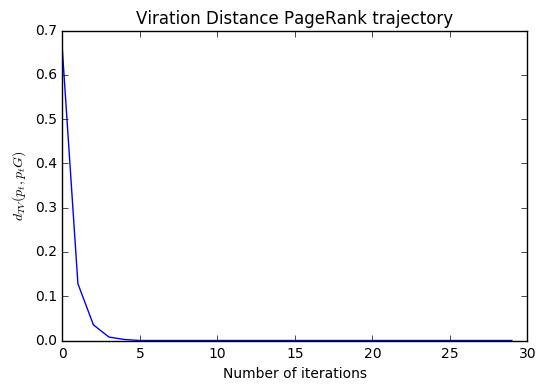

In [17]:
###### student code for Problem 5 here #######
##### student code for Problem 3 here #####

num_pages = 200    # specify the number of webpages
link_prob = 0.001  # specify the probability of an outgoing link
webgraph = nx.fast_gnp_random_graph(num_pages, link_prob, seed=None, directed=True)   # generate a random webgraph
A = nx.adjacency_matrix(webgraph)    # extract the adjacency matrix
B = np.array(A.todense())            # convert to dense np.array
row_sums = B.sum(axis=1)             # compute row sums
a = np.zeros(num_pages)              
a[row_sums == 0] = 1                 # create a vector that keeps track of pages with no outgoing links

#### now we generate the Random Surfer Model matrix ####
E = np.zeros((num_pages,num_pages))
E[:,0] = a                          
V = np.add(B,E)
row_sums = V.sum(axis=1)
S = V.astype(np.float) / row_sums.reshape(num_pages,1)

### google matrix###
alpha = 0.15
n = num_pages
G = (1-alpha)*S + alpha/n

#### first attempt at PageRank #####
p0 = np.ones(num_pages) / num_pages     # initialize with the uniform distribution
PR = Markov_dist_update(G,p0)           # instantiate a Markov_dist_update object
nstates = len(p0)   # number of states
niter = 30    # number of iterations
d_updates = np.stack((np.abs(PR.p(s)-PR.p(s+1)).sum()*0.5 for s in xrange(niter)),axis=-1)  # stack all the updates into an array

#plot
plt.title('Viration Distance PageRank trajectory')
plt.xlabel('Number of iterations')
plt.ylabel('$d_{TV}(p_t,p_t G)$')
plt.plot(np.arange(niter),d_updates)
